In [2]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

%matplotlib inline

# mac OS 에서 한글이 깨진다면 참고.
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# Colab
# !apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

## Bagging(배깅)


### Bagging Classifier

- 사이킷런의 ensemble에서 Bagging Classifier를 불러올 수 있다

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# 특성 2개만 추출 
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, 
                                                    random_state = 10, 
                                                    stratify = iris.target, 
                                                    shuffle = True)

In [6]:
model_bag = BaggingClassifier(DecisionTreeClassifier(random_state = 10),
                               n_estimators = 100,
                               max_samples = 40).fit(X_train, y_train)

##### Bagging Classifier의 파라미터
- base_estimator: 어떤 모델로 평가할 지 정하는 파라미터  값을 지정해주지 않으면 자동적으로 Decision Tree로 실행
- n_estimators: 몇 개의 모델을 앙상블해서 훈련시킬지 정하는 파라미터(디폴트 10)
- max_samples: 데이터 중 몇 개의 데이터를 선택할 지 정해주는 파라미터(디폴트 1.0)  
int형으로 갯수를 지정해줄 수 있고, float형식으로 비율을 정해줄 수 있다. 
- bootstrap: 데이터의 중복 사용 여부를 결정하는 파라미터(디폴트 True)
- n_jobs :훈련과 예측에서 사용할 CPU 코어 수  
(-1로 설정시 가용한 모든 코어 사용)
- odd_score: 사용되지 않은 데이터를 가지고 모델을 평가하도록 설정하는 파라미터  
(디폴트 True)

In [7]:
model_dt = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

##### 배깅과 결정트리 비교

In [12]:
# 배깅(앙상블)과 결정트리의 test score 비교

print("배깅을 사용한 경우 Test Score : {:.3f}".format(model_bag.score(X_test, y_test)))
print('결정트리의 test score : {:.3f}'.format(model_dt.score(X_test, y_test)))

배깅을 사용한 경우 Test Score : 0.711
결정트리의 test score : 0.605


In [13]:
def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([4.5, 7.6])
    plt.ylim([2.0, 4.0])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


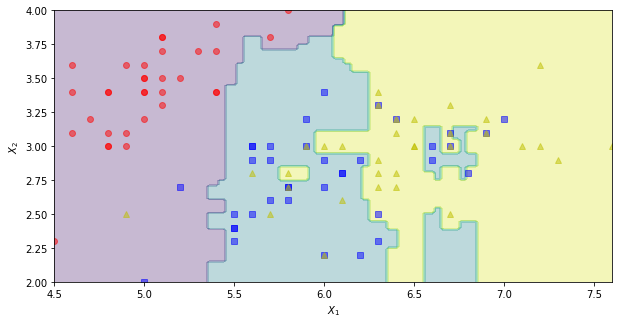

In [14]:
# 배깅의 Decision Boundary 
model_border(model_bag, X_train, y_train)

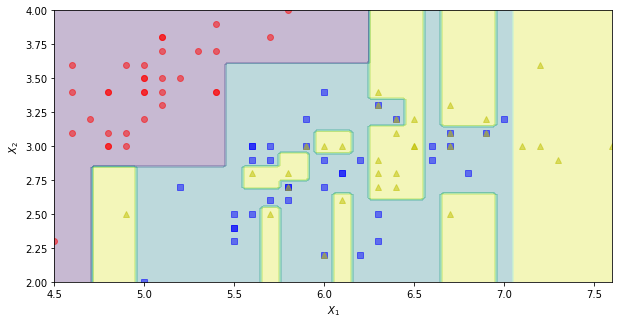

In [15]:
#결정트리의 Decision Boundary
model_border(model_dt, X_train, y_train)

배깅을 사용한 모델의 경계가 더 규칙적인 모습을 띄고 있는 것을 알 수 있다. 
___

### Random Forest

- 랜덤 포레스트는 배깅 방법을 적용한 결정트리의 앙상블 모델이다. 

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [70]:
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [74]:
forest = RandomForestClassifier(100, max_depth = 1, max_features = int(np.sqrt(X_train.shape[1])))

In [75]:
# 깊이가 1인 결정트리 100개 만들기
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
forest.score(X_train, y_train)

0.675

In [77]:
forest.score(X_test, y_test)

0.6333333333333333

In [80]:
y_pred = forest.predict(X_test)[:10]
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [82]:
forest.predict_proba(X_test)[:10]

# 각 학습기를 합쳐서 나눈 것; 0일 확률 0.009, 1일 확률 0.5, 2일 확률 0.48

array([[0.00985609, 0.50500609, 0.48513781],
       [0.8478326 , 0.07488049, 0.07728691],
       [0.00612276, 0.49945054, 0.4944267 ],
       [0.00985609, 0.50500609, 0.48513781],
       [0.00985609, 0.50500609, 0.48513781],
       [0.95769454, 0.03132041, 0.01098505],
       [0.00985609, 0.50500609, 0.48513781],
       [0.00612276, 0.49945054, 0.4944267 ],
       [0.00985609, 0.50500609, 0.48513781],
       [0.00985609, 0.50500609, 0.48513781]])

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_train[:10]))

              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       1.00      0.25      0.40         8
           2       0.00      0.00      0.00         0

    accuracy                           0.30        10
   macro avg       0.38      0.25      0.21        10
weighted avg       0.83      0.30      0.36        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- macro avg: 각 예측기들이 낸 결과의 평균
- micro avg: 각 객체들의 확률을 각각 더해서 평균낸 것

##### wine data

In [6]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [85]:
from sklearn.ensemble import RandomForestClassifier
for_clf = RandomForestClassifier(n_estimators=100, max_depth = 1, random_state = 42)
for_clf.fit(X_train, y_train)
for_clf.score(X_train, y_train), for_clf.score(X_test, y_test)

(0.9774436090225563, 0.9555555555555556)

In [86]:
for_clf.feature_importances_

array([0.12, 0.02, 0.01, 0.03, 0.01, 0.02, 0.28, 0.01, 0.03, 0.17, 0.13,
       0.07, 0.1 ])

In [88]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

<BarContainer object of 13 artists>

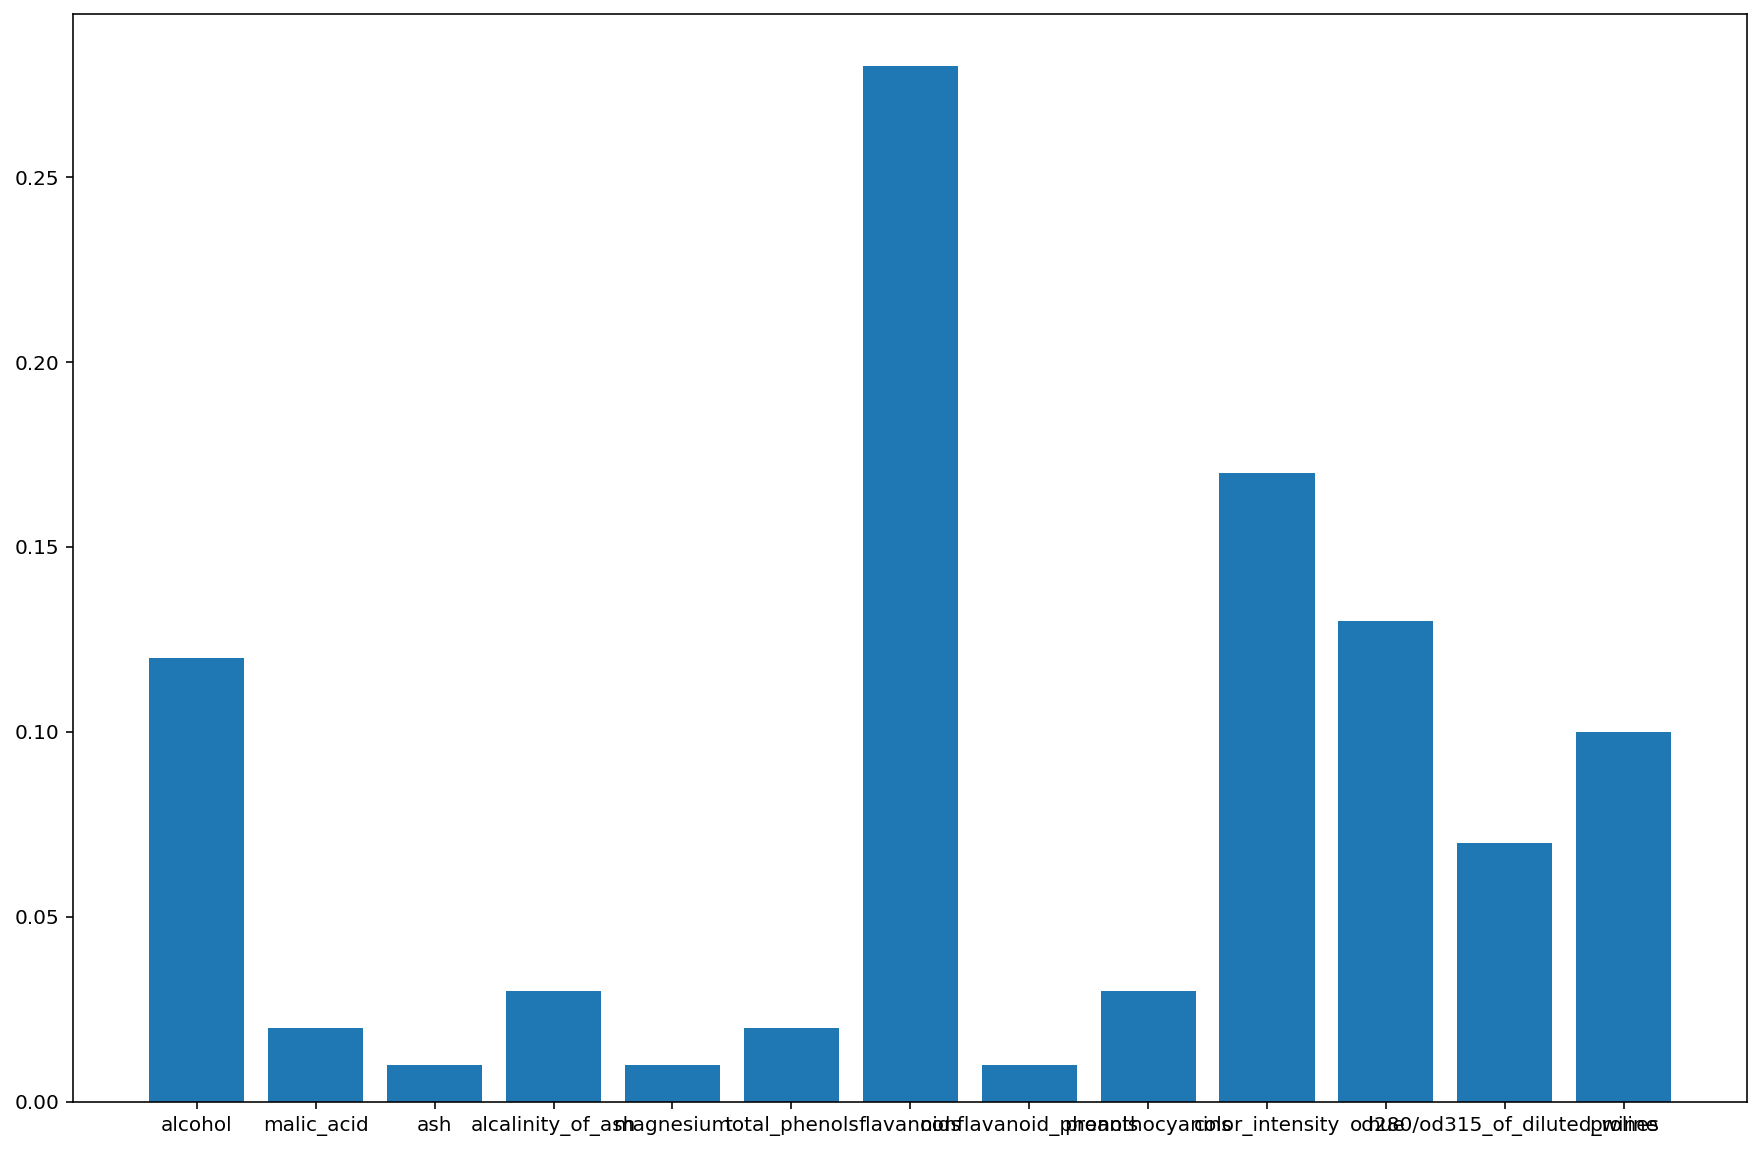

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,10))
plt.bar(wine.feature_names, for_clf.feature_importances_)

##### Diabetes Data(Regressor)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 10)

(442, 10)


In [8]:
# Forest Regressor
forest_reg = RandomForestRegressor(100,max_depth=1, random_state =10)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train), forest_reg.score(X_test, y_test)

(0.39031010742257044, 0.5058508098110196)

- Underfit: 보다 복잡한 모델 필요
(max_depth를 올려주던가, n_estimator를 늘리던가)

In [9]:
# MSE와 y의 표준편차 비교
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(forest_reg.predict(X_train), y_train)))
y_train.std()

60.17740109469788


77.068859133502

In [10]:
# estimator 1000개 , n_jobs = -1, 전체코어 다쓰기
forest_reg = RandomForestRegressor(100, max_depth=3, random_state = 10, n_jobs = -1)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.5640722485541825

In [11]:
# 뭐가 최적인지 어떻게 찾음? 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [1000, 2000, 3000],
    'max_depth' : [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv= 10, n_jobs = -1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [12]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 2000}

In [13]:
grid_search.cv_results_

{'mean_fit_time': array([1.87502177, 3.71834302, 5.6675081 , 2.13553109, 4.24786646,
        6.34844999, 2.34196889, 4.71356249, 7.08034887, 2.58237166,
        5.17334659, 7.75152619, 2.78576291, 5.56312482, 8.262659  ]),
 'mean_score_time': array([0.08079503, 0.16846857, 0.2462064 , 0.08504958, 0.16597679,
        0.24692299, 0.08262577, 0.16929302, 0.26063452, 0.08670239,
        0.17315879, 0.26207008, 0.08294966, 0.17242751, 0.25164433]),
 'mean_test_score': array([0.32710663, 0.32924837, 0.32944066, 0.40937666, 0.40813966,
        0.40830873, 0.43368442, 0.43207023, 0.43119128, 0.43456353,
        0.43489064, 0.43360207, 0.43044691, 0.43217598, 0.43229428]),
 'param_max_depth': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10

In [14]:
model = grid_search.best_estimator_
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.6401223372630128, 0.4533845665945374)

##### iris Data

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# 특성 2개만 추출 
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, 
                                                    random_state = 10, 
                                                    stratify = iris.target, 
                                                    shuffle = True)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=9, random_state = 0).fit(X_train, y_train)

In [22]:
# 랜덤 포레스트로 만들어진 트리는 estimators_에 저장이된다.
model_rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [23]:
# class_로 클래스를 확인할 수 있다.
model_rf.classes_

array([0, 1, 2])

In [24]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.

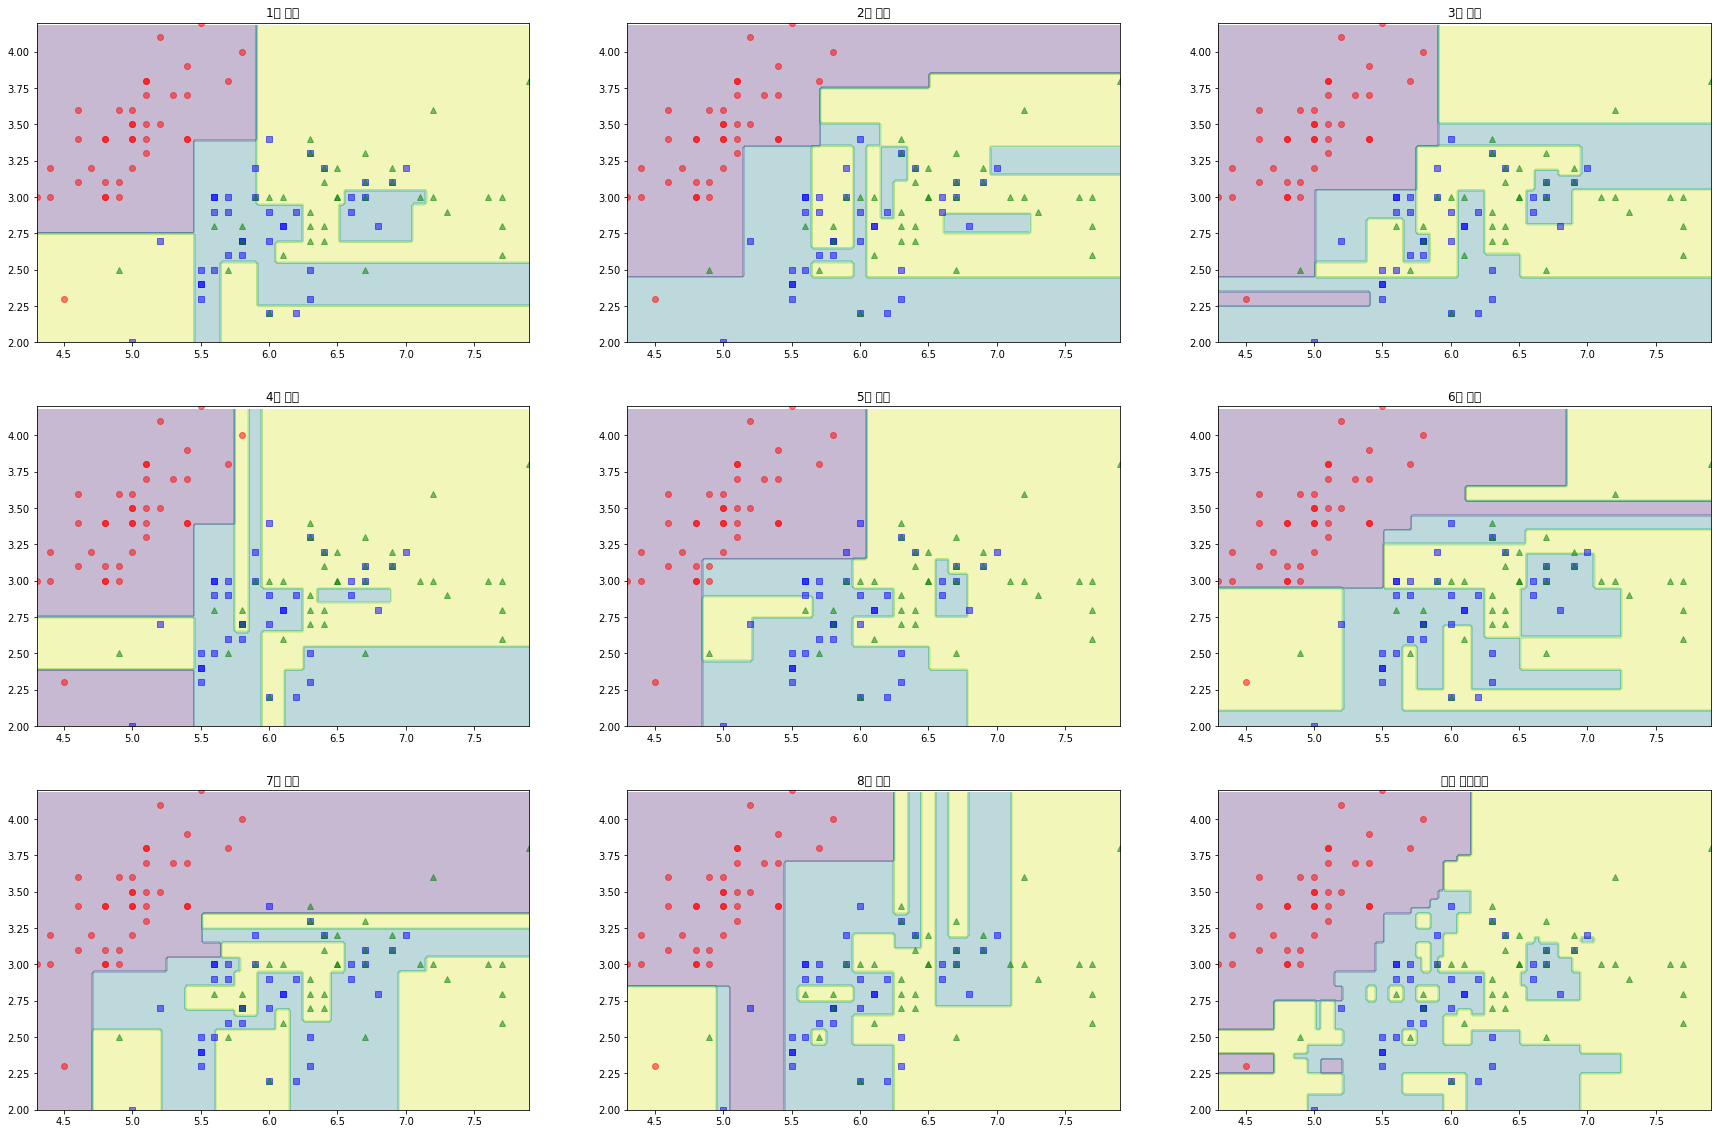

In [25]:
plt.figure(figsize = (30,20))

# plt.sublpot(3,3,1)은 3행 3열 1번째 공간에 그래프를 그린다.
plt.subplot(3,3,1)
plt.title("1번 트리")
draw_border(model_rf.estimators_[0],X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 트리")
draw_border(model_rf.estimators_[1],X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 트리")
draw_border(model_rf.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 트리")
draw_border(model_rf.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 트리")
draw_border(model_rf.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 트리")
draw_border(model_rf.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 트리")
draw_border(model_rf.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 트리")
draw_border(model_rf.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("랜덤 포레스트")
draw_border(model_rf, X_train, y_train)


- 아홉 개의 트리마다 경계가 각각 다르다는 것을 확인할 수 있다.  
- 예제에서는 아홉개의 트리만 이용했지만 큰 데이터를 이용해서 트리의 개수를 수백 개 또는 그 이상으로 늘리면 경계가 더 부드러워진다.

In [26]:
print('train score: {:.3f}'.format(model_rf.score(X_train, y_train)))
print('test score: {:.3f}'.format(model_rf.score(X_test, y_test)))

train score: 0.920
test score: 0.737


##### 랜덤포레스트와 결정트리 비교

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size = 0.2, shuffle = True)

In [ ]:
# 랜덤포레스트 모델
randf = RandomForestClassifier(n_estimators=50, random_state = 42).fit(X_train, y_train)

In [30]:
randf.feature_importances_

# 특성 중요도를 살펴보면 0인값이 존재하지 않는다

array([0.04353356, 0.00947196, 0.07480418, 0.04805572, 0.00823308,
       0.0201524 , 0.06711137, 0.08648324, 0.00694492, 0.00309093,
       0.02066959, 0.00481944, 0.01317836, 0.03457808, 0.00444065,
       0.00624106, 0.00763155, 0.00227332, 0.00381982, 0.00646233,
       0.07059026, 0.01336647, 0.11002736, 0.08397613, 0.008329  ,
       0.01719787, 0.05284948, 0.15489998, 0.00927767, 0.00749021])

In [31]:
# 결정트리 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth = 5, 
                             random_state = 42).fit(X_train, y_train)

In [33]:
dtc.feature_importances_

# 특성 중요도에 0인 값이 존재한다

array([0.        , 0.01361866, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0219615 , 0.01434799,
       0.        , 0.        , 0.        , 0.        , 0.01073496,
       0.02400263, 0.0503555 , 0.66333768, 0.0207954 , 0.00608578,
       0.        , 0.        , 0.1747599 , 0.        , 0.        ])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

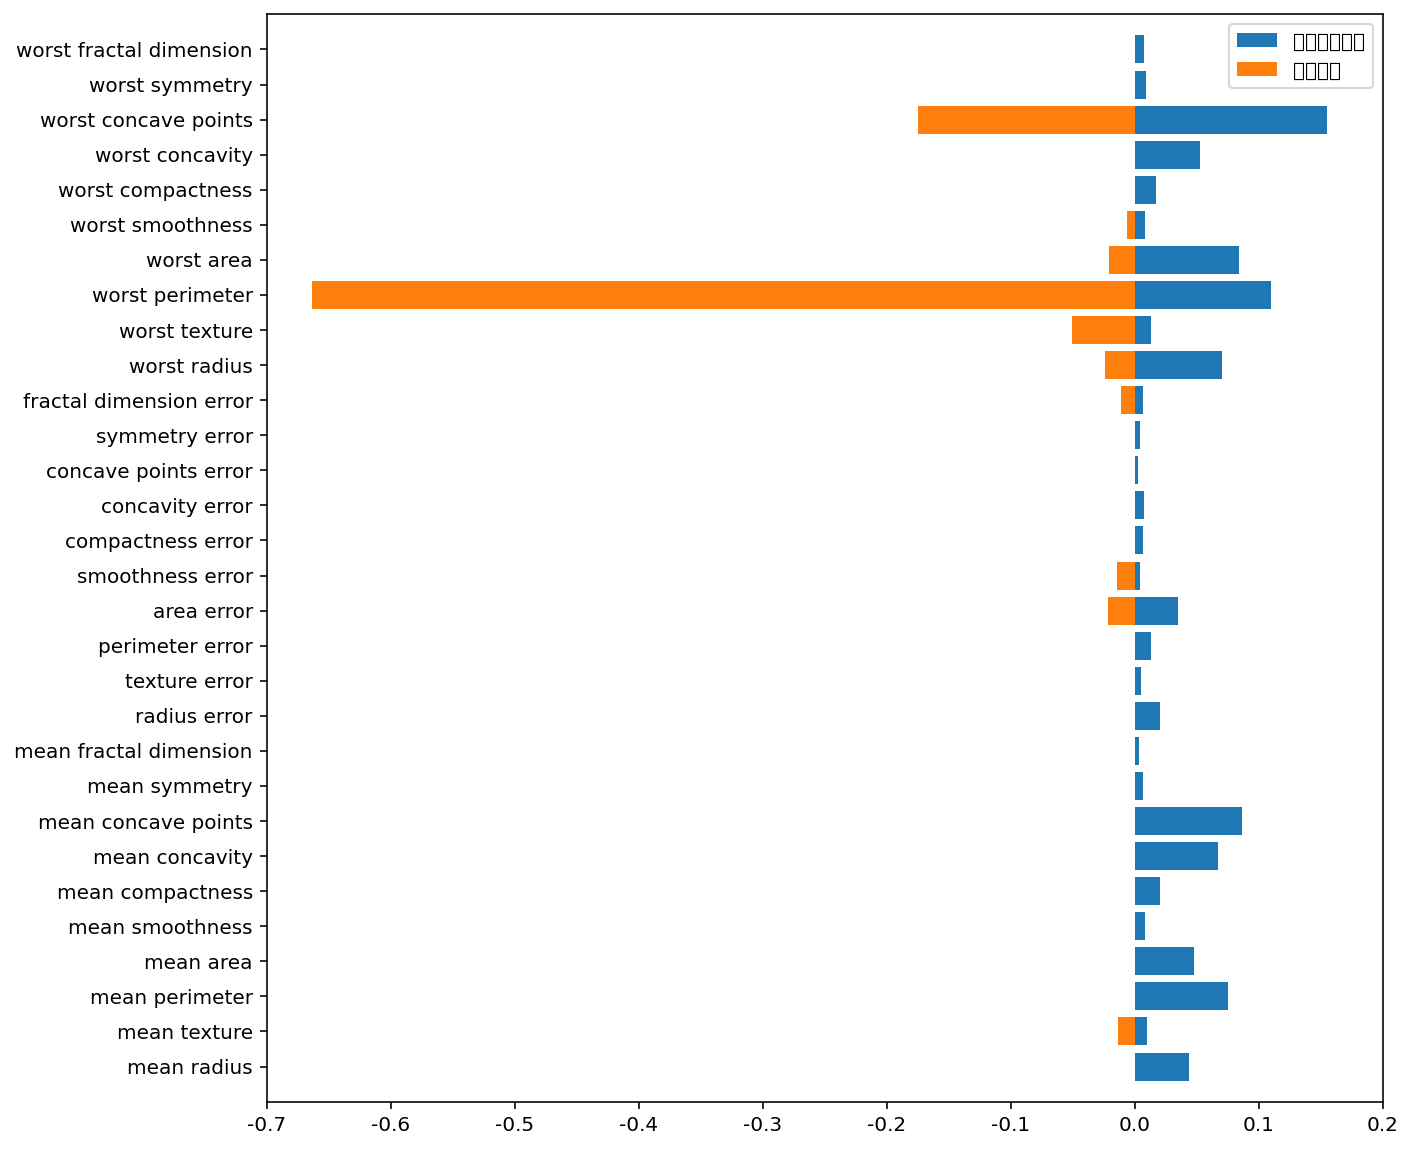

In [39]:
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = dtc.feature_importances_

plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.xlim([-0.7, 0.2])
plt.ylim(-1, cancer.data.shape[1])
plt.legend(["랜덤포레스트", "결정트리"])
plt.show()

- 결정트리와 특성의 중요도를 비교했다. 결정트리에선 worst perimeter 특성이 매우 중요하다고 나오지만 랜덤 포레스트에서는 worst perimeter를 중요하게 생각하지만 그에 못지않게 중요도가 높게 나오는 특성들이 존재한다.

- 랜덤 포레스트는 n_estimators가 클수록 좋다. 그러나 너무 많은 트리는 훈련시간이 길어지는 단점이 있다. 그러므로 적당한 트리 수를 가용된 시간과 메모리의 양을 따져서 정해줘야 한다.

## Boosting

### Ada Boost(에이다 부스트)

##### 기본 에이다 부스트

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size = 0.3,
                                                   shuffle = True, random_state=42)

In [41]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators = 9, algorithm = 'SAMME.R', 
                               learning_rate = 0.5).fit(X_train, y_train)

##### 에이다 부스트의 파라미터

- base_estimator: 모델을 정해주는 파라미터  
값을 지정해주지 않으면, 기본값으로 DecisionTreeClassifier(max_depth =1)로 설정된다
- learning_rate: 이전 트리의 오차를 얼마나 강하게 보정할 것인지 설정. 클수록 강하게 
(디폴트는 1.0)
- algorithm: 사이킷런에서 제공하는 에이다 부스트는 SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function)이라는 알고리즘으로 구현되어있다. 기본값은 SAMME.R(R은 real)이다. 
  - SAMME는 AdaBoost와 알고리즘은 유사하다. 다만 n번쨰 모델의 가중치를 구하는 부분만 AdaBoost와 다른 수식을 가진다. 

  - 만약 클래스의 수가 2인 이중분류에서는 SAMME는 AdaBoost와 동일한 알고리즘이 된다. SAMME.R은 모델의 예측값을 이용하는게 아니라 클래스의 확률을 기반으로 한다. 

In [42]:
#랜덤포레스트와 같이 에이다 부스트의 예측기들은 estimators_에 저장된다. 
model_ada.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=622174628, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=160981686, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=No

In [43]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backe

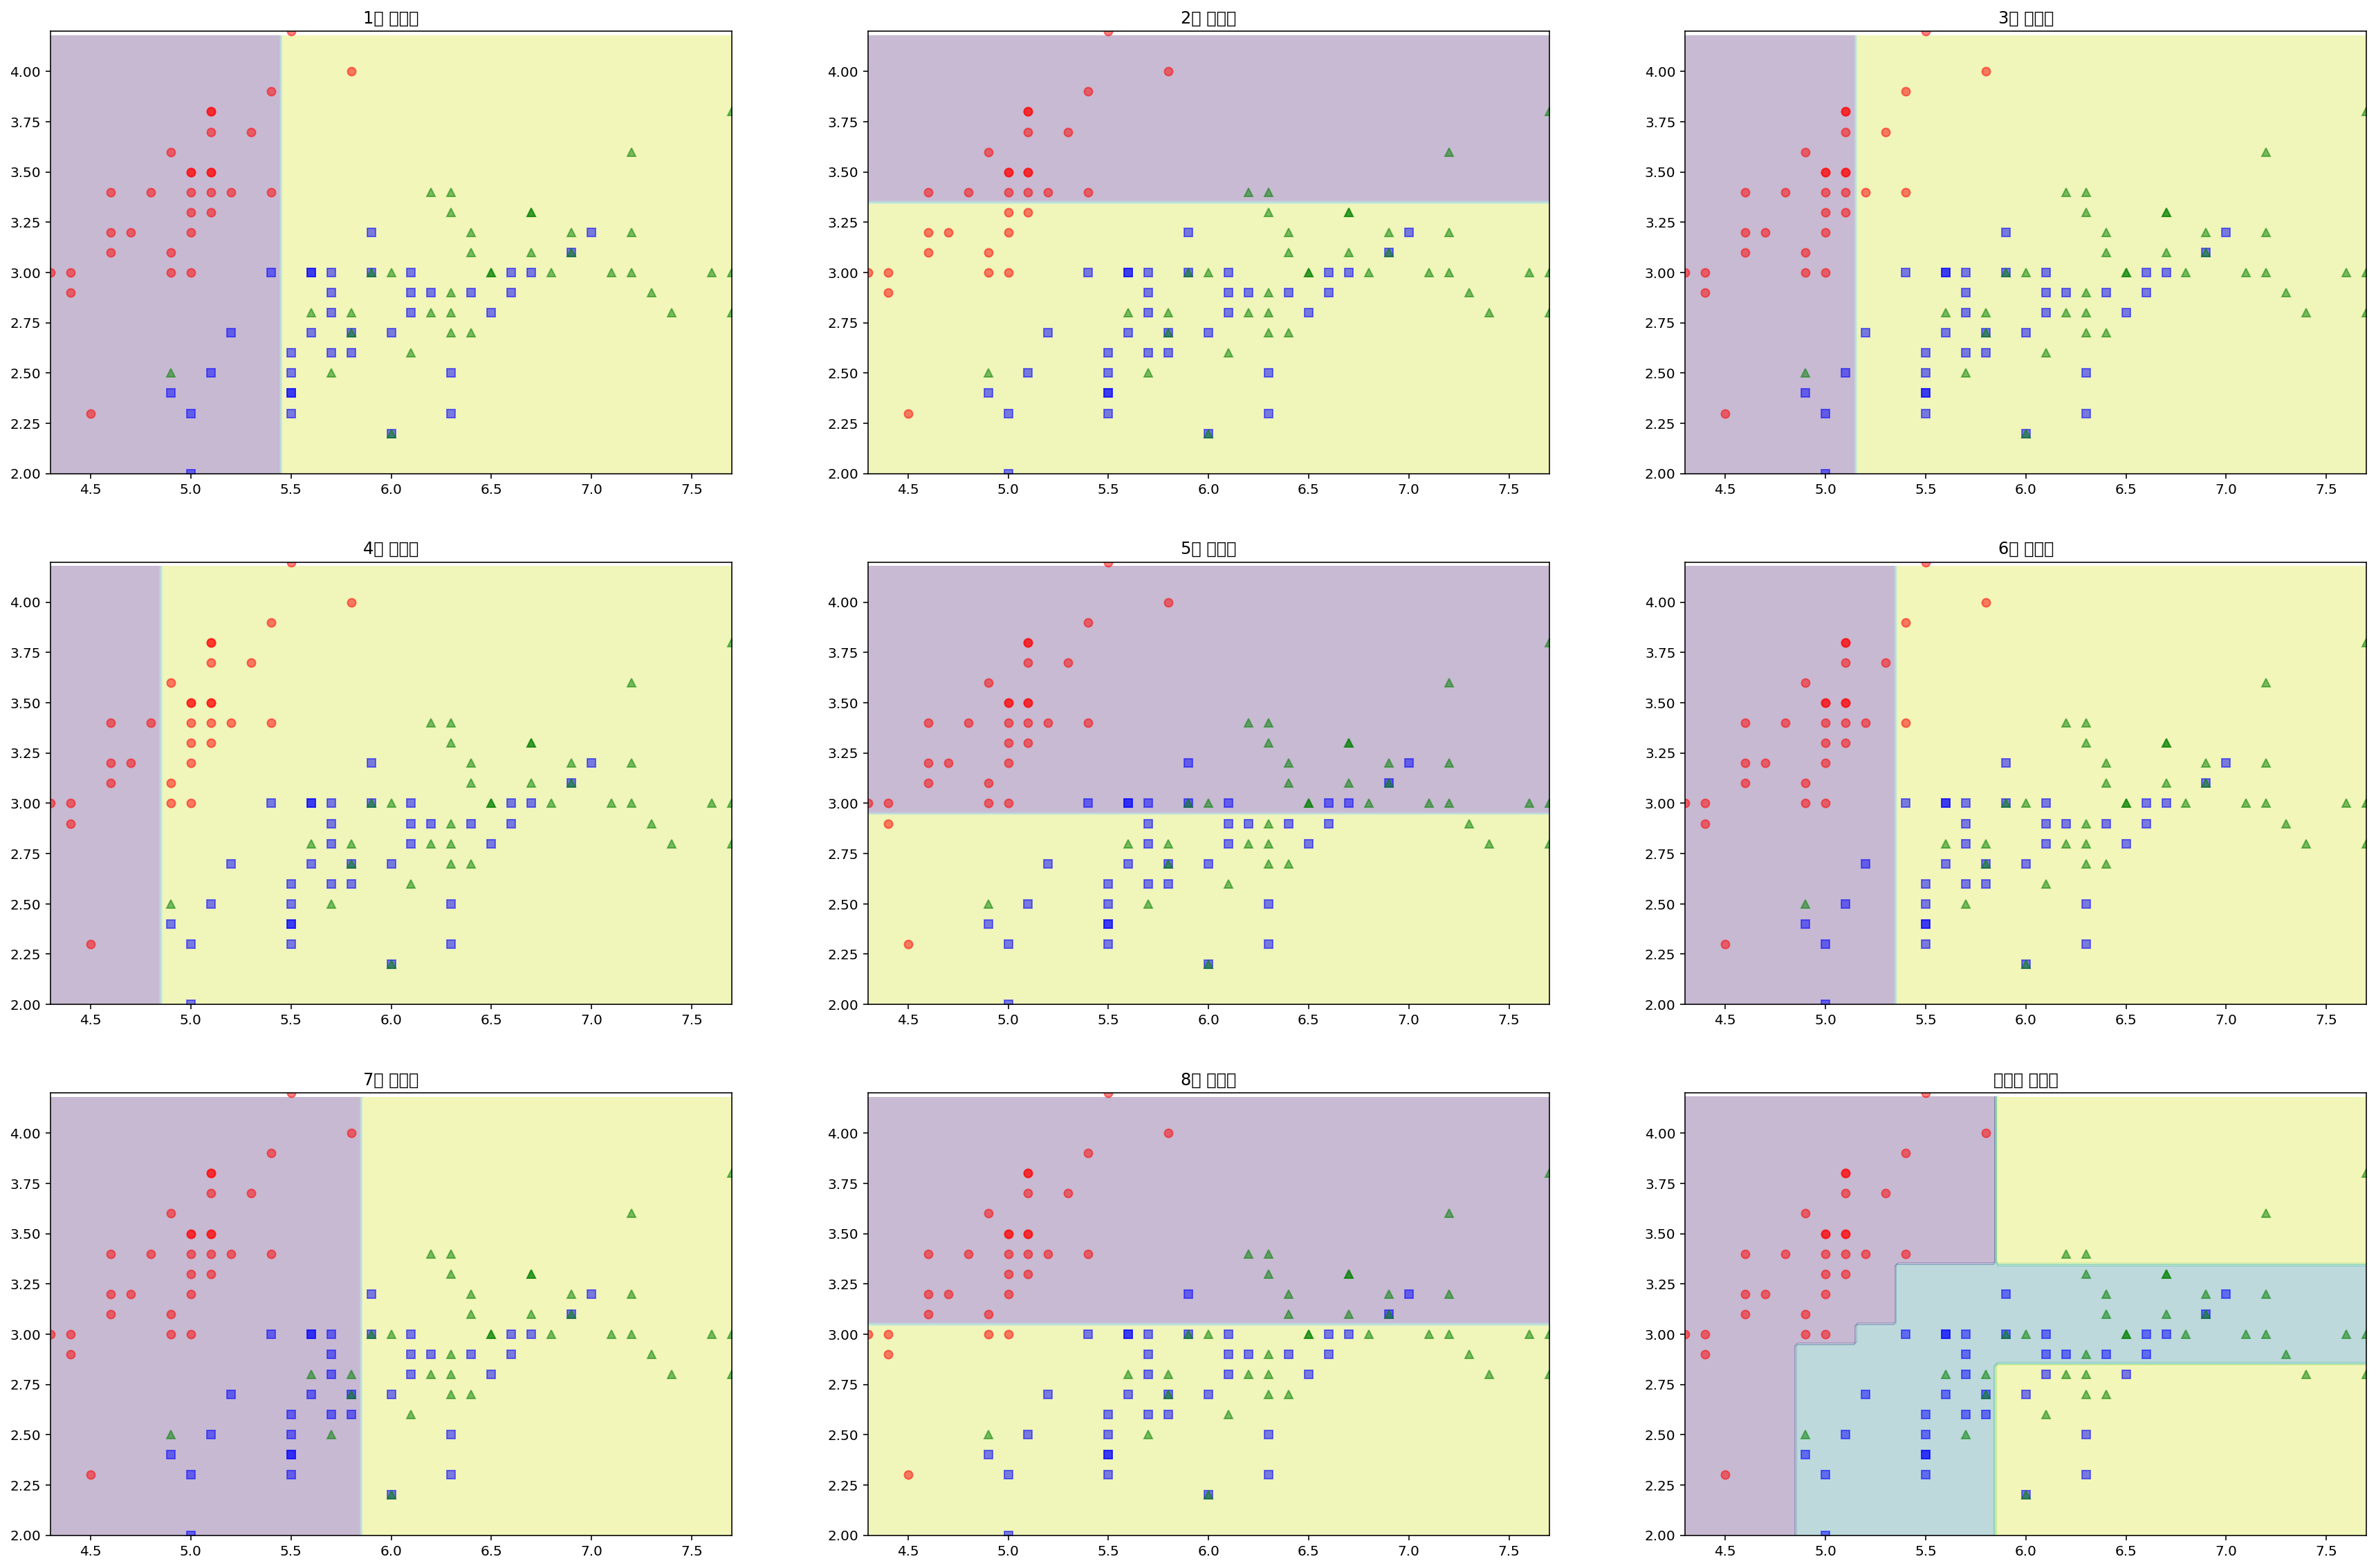

In [44]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(model_ada.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(model_ada.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(model_ada.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(model_ada.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(model_ada.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(model_ada.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(model_ada.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(model_ada.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(model_ada, X_train, y_train)

# - 에이다 부스트는 깊이가 1인 결정트리를 사용한다. 
# 깊이가 1이기 때문에 경계선이 하나만 표시 되어있다. 
# 앙상블된 모델역시 경계선이 단순하게 그려져있다.

- algorithm이 SAMME.R인 경우에는 predict_proba를 이용해 각 클래스의 확률을 알 수 있다.

In [49]:
model_ada.classes_

array([0, 1, 2])

In [48]:
print(X_test.shape)
print(model_ada.predict_proba(X_test).shape)

(45, 2)
(45, 3)


In [53]:
model_ada.predict_proba(X_test)[:10]

array([[1.43793936e-04, 4.86777942e-01, 5.13078264e-01],
       [5.01091059e-01, 1.61021495e-02, 4.82806792e-01],
       [1.43793936e-04, 4.86777942e-01, 5.13078264e-01],
       [4.61611779e-04, 6.11671926e-01, 3.87866463e-01],
       [1.43793936e-04, 4.86777942e-01, 5.13078264e-01],
       [6.66394173e-01, 1.32559817e-02, 3.20349846e-01],
       [2.48180421e-02, 6.32842907e-01, 3.42339051e-01],
       [5.29972908e-03, 5.63013167e-01, 4.31687104e-01],
       [1.43793936e-04, 4.86777942e-01, 5.13078264e-01],
       [8.01787490e-03, 5.22319609e-01, 4.69662516e-01]])

In [54]:
# 예측결과와 클래스의 확률을 비교해보자
model_ada.predict(X_test)[:10]

array([2, 0, 2, 1, 2, 0, 1, 1, 2, 1])

In [57]:
# Ada SAMME.R의 Score
print('SAMME.R의 train_score :{:.3f}'.format(model_ada.score(X_train, y_train)))
print('SAMME.R의 test score : {:.3f}'.format(model_ada.score(X_test, y_test)))

SAMME.R의 train_score :0.705
SAMME.R의 test score : 0.756


##### SAMME 알고리즘

In [58]:
ada_samme = AdaBoostClassifier(n_estimators=9, algorithm='SAMME',
                               learning_rate = 0.5).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_te

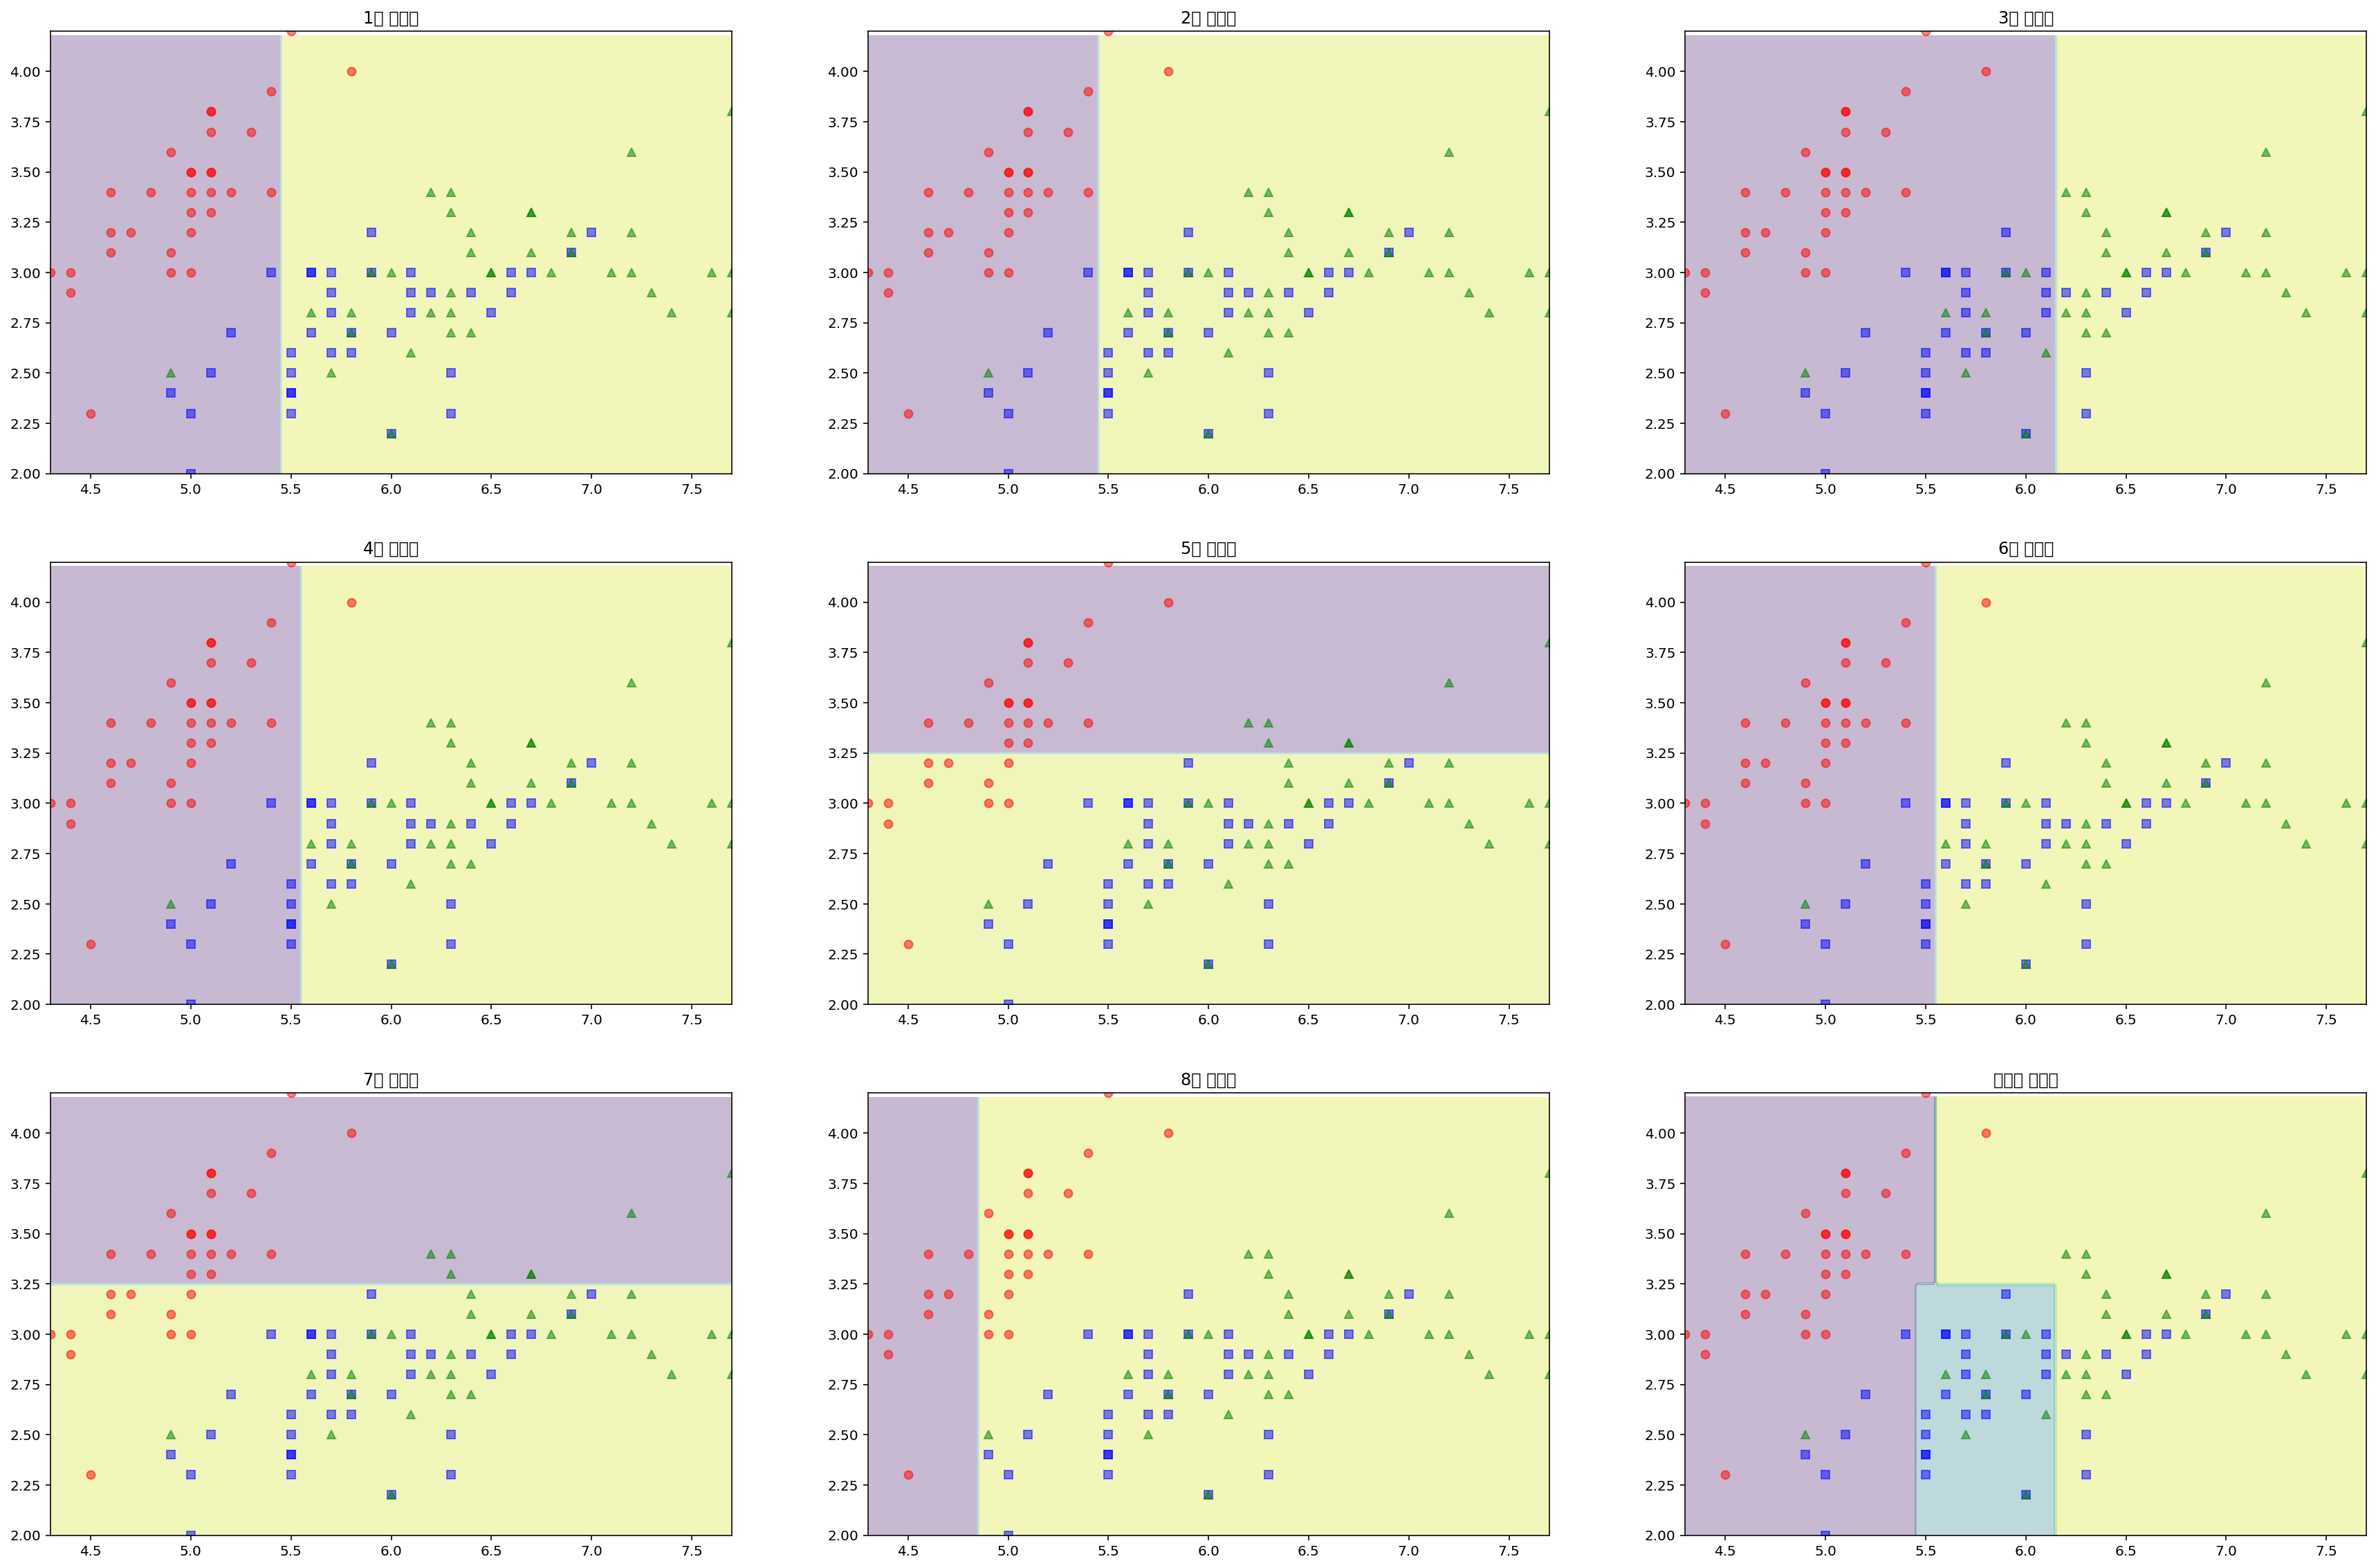

In [59]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(ada_samme.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(ada_samme.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(ada_samme.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(ada_samme.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(ada_samme.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(ada_samme.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(ada_samme.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(ada_samme.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(ada_samme, X_train, y_train)

In [61]:
# SAMME보다는 SAMME.R을 이용한 에이다부스트 모델이 성능이 더 높게 나오는 것을 확인할 수 있다.
print('SAMME의 train score : {:.3f}'.format(ada_samme.score(X_train, y_train)))
print('SAMME의 test score : {:.3f}'.format(ada_samme.score(X_test, y_test)))

SAMME의 train score : 0.752
SAMME의 test score : 0.756


##### 랜덤포레스트와 Adaboost 비교

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size = 0.2, shuffle = True)
randf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)
ada = AdaBoostClassifier(n_estimators=50, learning_rate = 0.5).fit(X_train, y_train)

In [64]:
randf.feature_importances_

array([0.04400775, 0.01665821, 0.08024576, 0.05267202, 0.0083609 ,
       0.0181507 , 0.08750677, 0.10036433, 0.00511831, 0.00179815,
       0.0272724 , 0.00593773, 0.0152262 , 0.03726445, 0.00472656,
       0.00452934, 0.00599885, 0.00371437, 0.00430167, 0.0043549 ,
       0.07846757, 0.01178438, 0.08662843, 0.07923967, 0.01115451,
       0.01487012, 0.05250062, 0.12400166, 0.00955497, 0.00358871])

In [65]:
ada.feature_importances_

array([0.  , 0.06, 0.  , 0.  , 0.02, 0.  , 0.04, 0.06, 0.02, 0.  , 0.02,
       0.  , 0.06, 0.1 , 0.02, 0.08, 0.  , 0.  , 0.06, 0.02, 0.  , 0.08,
       0.04, 0.12, 0.06, 0.  , 0.06, 0.04, 0.04, 0.  ])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

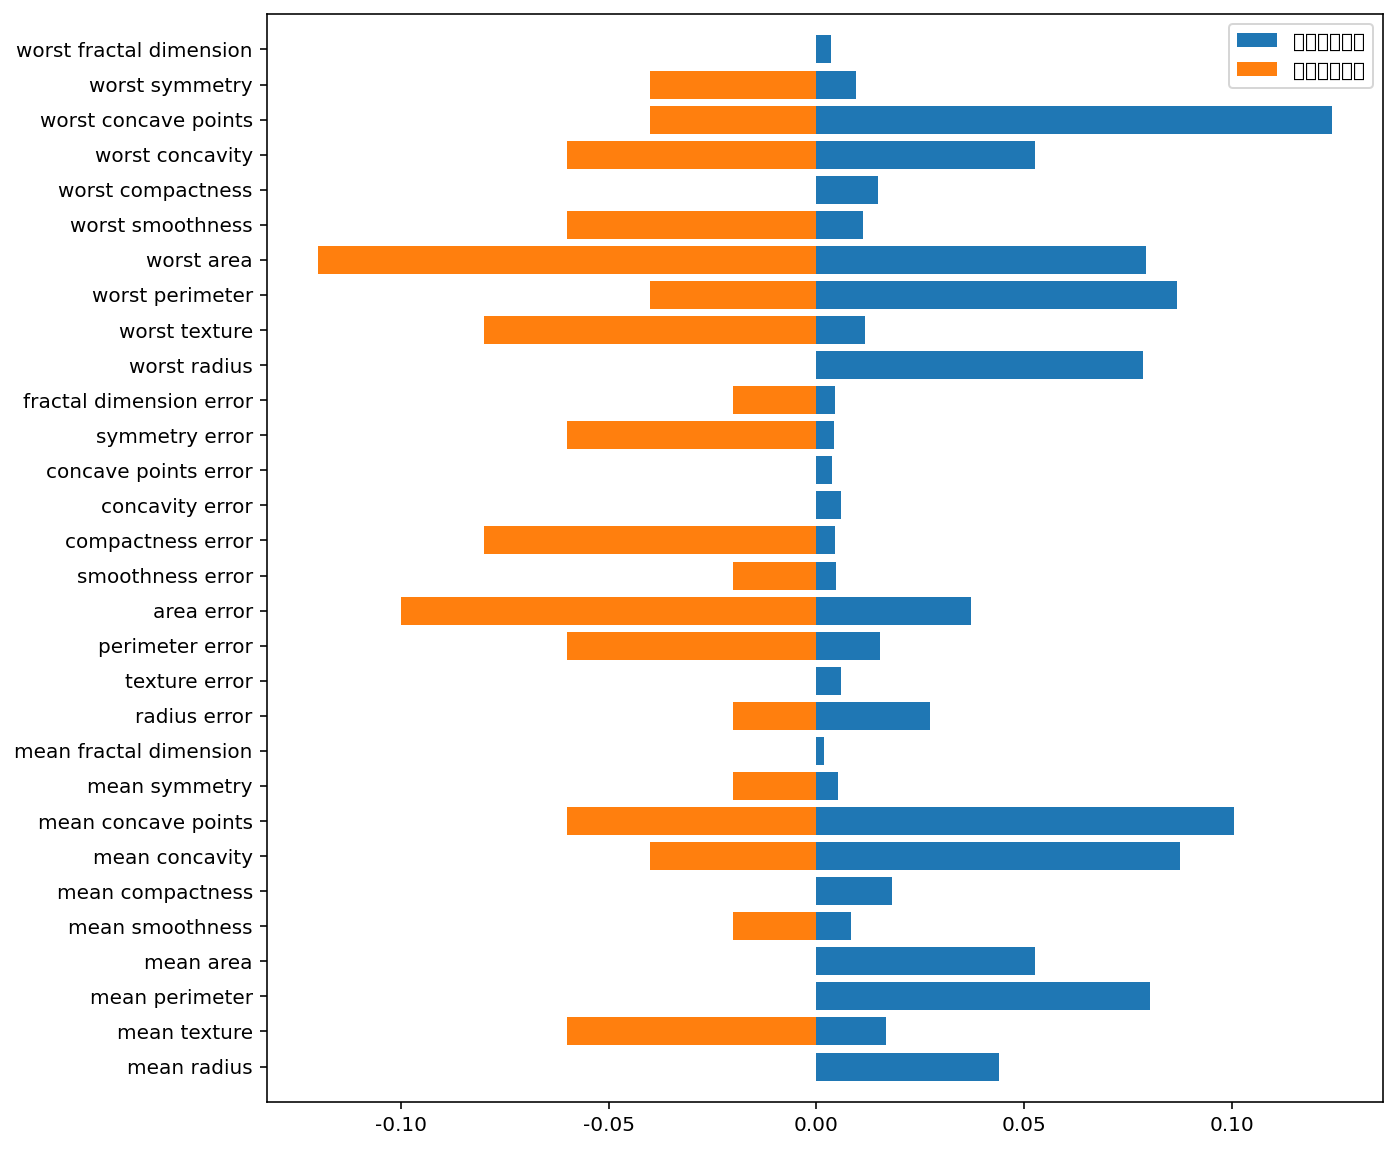

In [67]:
# 에이다 부스트와 랜덤 포레스트의 특성 중요도 비교
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = ada.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.legend(['랜덤포레스트','에이다부스트'])
plt.show()

- 0의 값을 가진 특성들도 있고 다른 모델에서는 중요하게 생각하지 않은 특성을 오히려 중요하게 보는 경우도 있다.

### Gradient Boost

사이킷런에서 제공하는 GradientBoostingClassifier와 GradientBoostingRegressor모두 DecisionTreeRegressor를 사용하여 구현되어 있다.

In [110]:
GradientBoostingClassifier?

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
model_grad = GradientBoostingClassifier

##### 그래디언트 부스팅의 파라미터
  - loss : 그래디언트 부스팅에 다른 비용 함수를 사용할 수 있다. 기본값은 로지스틱 손실 함수인 'deviance'이고 에이다부스트에서 사용하는 'exponential'도 있다.  
    - GradientBoostingRegressor에도 loss파라미터가 존재하는데 기본값은 'ls(최소제곱)'이고 'lad(최소 절댓값 오차)', 'huber(후버 손실함수)', 'quantile(사분위수 손실함수)'가 있다.
  - learning_rate : 에이다 부스트의 파라미터와 비슷하게 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 정해주는 파라미터이다. 기본값은 0.1이다.  
  - subsample : 각 트리가 훈련할 때 사용할 데이터의 비율을 지정한다. 'subsample = 0.3'이면 각 트리는 무작위로 선택된 30%의 훈련 데이터로 학습된다.
  - 결정 트리를 제어하는 파라미터인 'max_depth(default =3), min_samples_leaf' 등을 가지고 있다.

In [104]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state = 0)

model_grad = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

In [106]:
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

# 훈련점수가 1.0으로 과적합

train score : 1.000
test score : 0.965


In [108]:
# 과적합을 막기위해 트리의 깊이를 1로 설정(기본: 3)
model_grad = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

# 훈련점수는 낮아지고, 테스트 점수는 높아짐

train score : 0.991
test score : 0.972


In [109]:
# 학습률 조정 (디폴트 0.1)
model_grad = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print('train score : {:.3f}'.format(model_grad.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_grad.score(X_test, y_test)))

# 학습률을 낮춰도 과적합을 방지할 수 있음. 

train score : 0.988
test score : 0.965


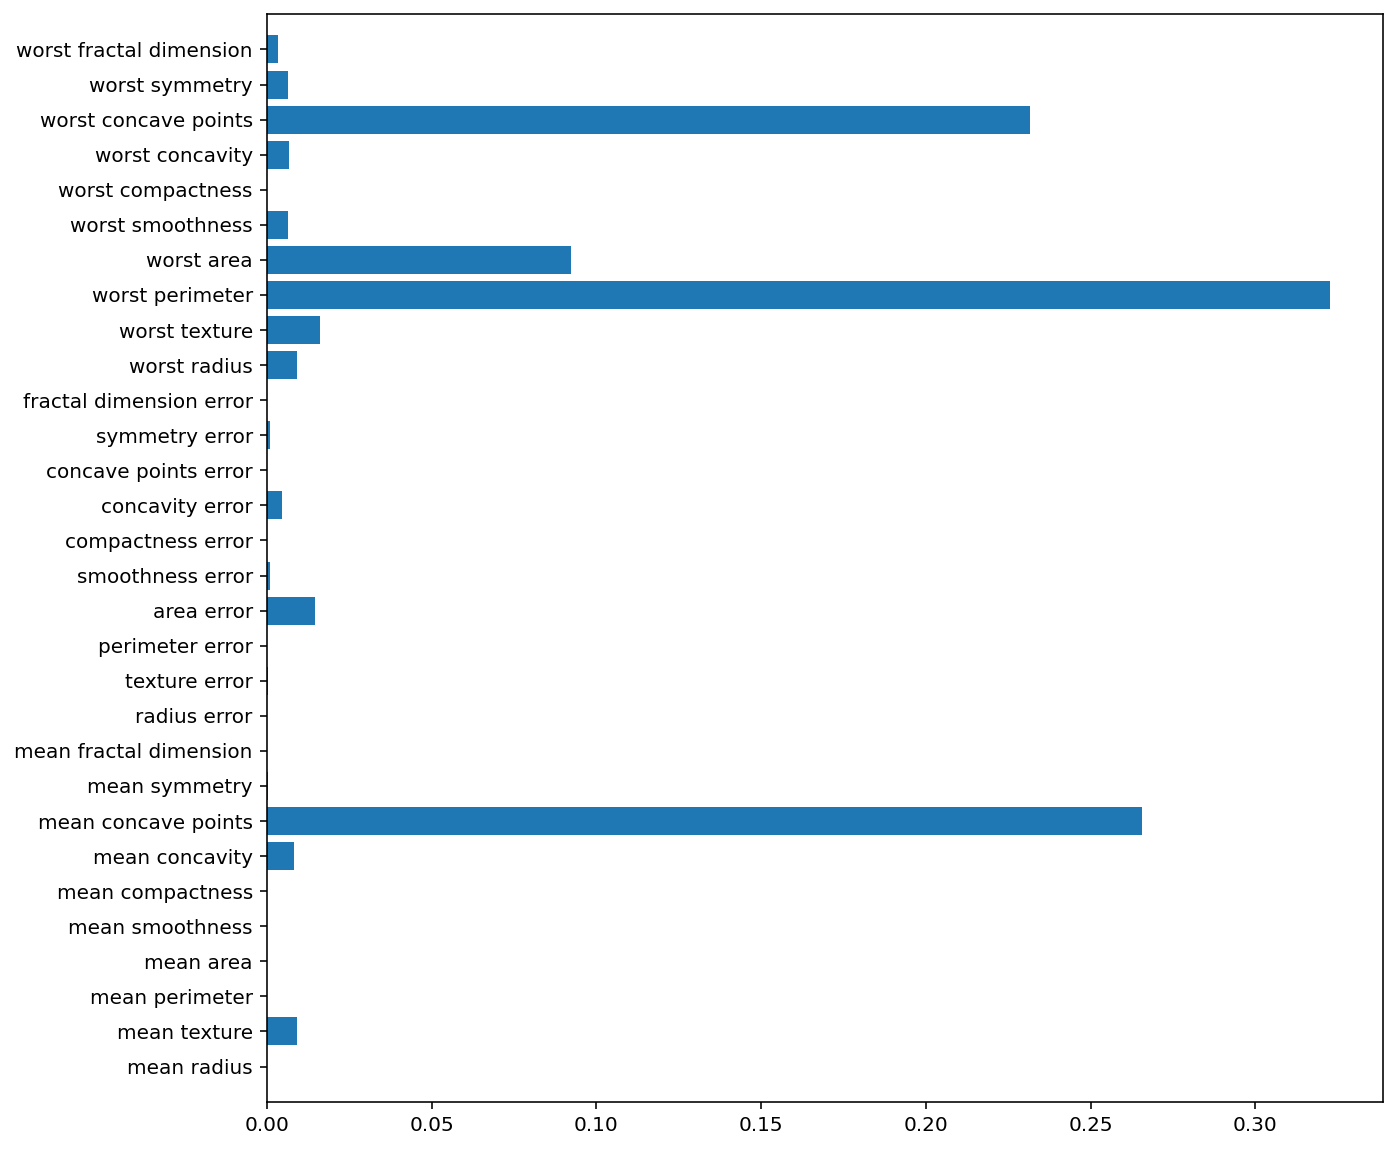

In [111]:
grbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

plt.figure(figsize=(10,10))
X = np.arange(cancer.data.shape[1])
Y = grbc.feature_importances_
plt.barh(X, Y, align = 'center')
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.show()

- 몇몇 특성들은 완전히 무시
- 그래디언트 부스팅의 단점:
  -  파라미터를 잘 조정해야 함
  - 훈련시간이 다른 모델에 길다
- 그래디언트 부스팅은 n_estimators를 크게 하면 모델이 복답해져 과적합 될 가능성이 크다. 적절한 n_estimators와 learning_rate를 찾는 것이 관건이다. 

### XGBoost

 xgboost는 사이킷런에서 제공하지 않기 때문에 별도의 설치과정이 필요하다.
- https://xgboost.readthedocs.io/en/latest/build.html (공식 문서 영문)를 참고하여 설치

부록으로 따로 빼기
- http://corazzon.github.io/xgboost-install-mac-osx (macOS 한글)
- http://quantfactory.blogspot.com/2017/04/xgboost.html (window 한글)

XGBoost는 GBM(Gradient Boosting)의 결정 트리를 구성할 때 병렬 처리를 사용하여, 수행시간을 GBM에 비해 훨씬 단축시켰다.

In [114]:
!pip install xgboost

In [115]:
import xgboost as xgb
model = xgb.XGBClassifier()

#### XGboost의 파라미터
- XGboost의 경우에는 파라미터를 3개의 범주로 나눈다. 일반적인 파라미터(General parameters), 부스터 파라미터(Booster parameters), 학습 과정 파라미터(Learning Task parameters)로 구성 되어있다.  

##### General parameters
- booster : 어떤 부스터 구조를 쓸 것인지 정하는 파라미터이다. gbtree(결정트리), gblinear(선형모델), dart(Drop out Regression Trees)가 있고 기본값은 'gbtree'이다, gbtree의 성능이 제일 낫다.  
- n_jobs : xgboost를 실행시 병렬처리에 사용되는 코어 수, 따로 값을 주지 않으면 자동적으로 코어를 탐지하여 사용.  
- num_feature : 특성의 수를 정해줘야 하는 경우에 사용.  

##### Booster parameters
- learning_rate : 가중치를 정해주는 파라미터이다.    
- gamma : 트리가 분할을 할 때 필요한 최소 손실 감소(Minimum Loss reduction)를 지정해준다, 값이 커지면 트리의 깊이가 줄어들어 보수적인 모델이 된다.  
- max_depth : 트리의 깊이를 정해주는 파라미터  
- reg_lambda : L2 norm. 값이 커질수록 모델이 보수적으로 변한다.  
- reg_alpha : L1 norm. 값이 커질수록 모델이 보수적으로 변한다. 

##### Learning Task parameters
- objective : 목적함수를 정해주는 파라미터이다.  
    - binary:logistic는 이진분류, multi:softmax는 softmax는 다중 클래스 분류이다. 이 외에도 multi:softprob , rank:map 등 다양한 값들이 존재한다.  
- eval_metric : 모델의 평가 함수를 설정하는 파라미터로 회귀분석이면 'rmse', 분류 문제에는 'error'를 기본값으로 사용한다, objective에 따라 기본값이 설정되어 있다.  
    - rmse(root mean square error), mae(mean absolute error), error(Binary classification error rate) 등 여러 값들이 존재한다.  

#### Diabete Data (이진분류)

In [116]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.3, shuffle = True)

In [117]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree', 
                              learning_rate = 0.1, 
                              max_depth = 1).fit(X_train, y_train)

In [118]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

- 직접 만든 모델의 파라미터 설정을 확인할 수 있다.
- 유방암 데이터의 y값은 0과 1로 되어있어 objective가 binary:logist로 자동으로 설정되어 있는 것을 볼 수 있다.

In [120]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9874371859296482
test score : 0.9766081871345029


In [121]:
xgb_model.predict(X_test)[:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [122]:
xgb_model.predict_proba(X_test)[:10]

array([[0.0048992 , 0.9951008 ],
       [0.02036589, 0.9796341 ],
       [0.01207459, 0.9879254 ],
       [0.16903305, 0.83096695],
       [0.04211938, 0.9578806 ],
       [0.99566936, 0.00433063],
       [0.77075696, 0.22924307],
       [0.00211245, 0.99788755],
       [0.00781447, 0.99218553],
       [0.00707507, 0.9929249 ]], dtype=float32)

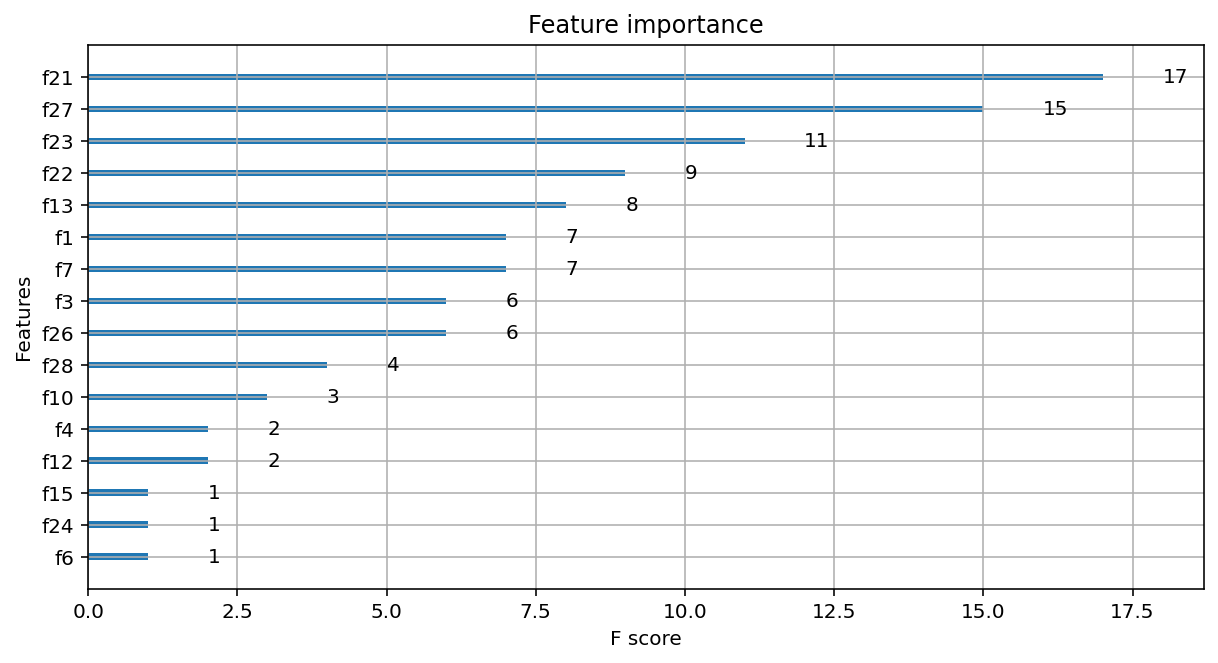

In [130]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10,5))
plot_importance(xgb_model, ax = ax)
plt.show()

# - xgboost의 plot_importance로 모델이 어떤 특성에 의존하고 있는지를 확인할 수 있다 
# 또한 직접 만든 데이터의 경우 특성들이 유효한지 확인해 볼 수도 있다.

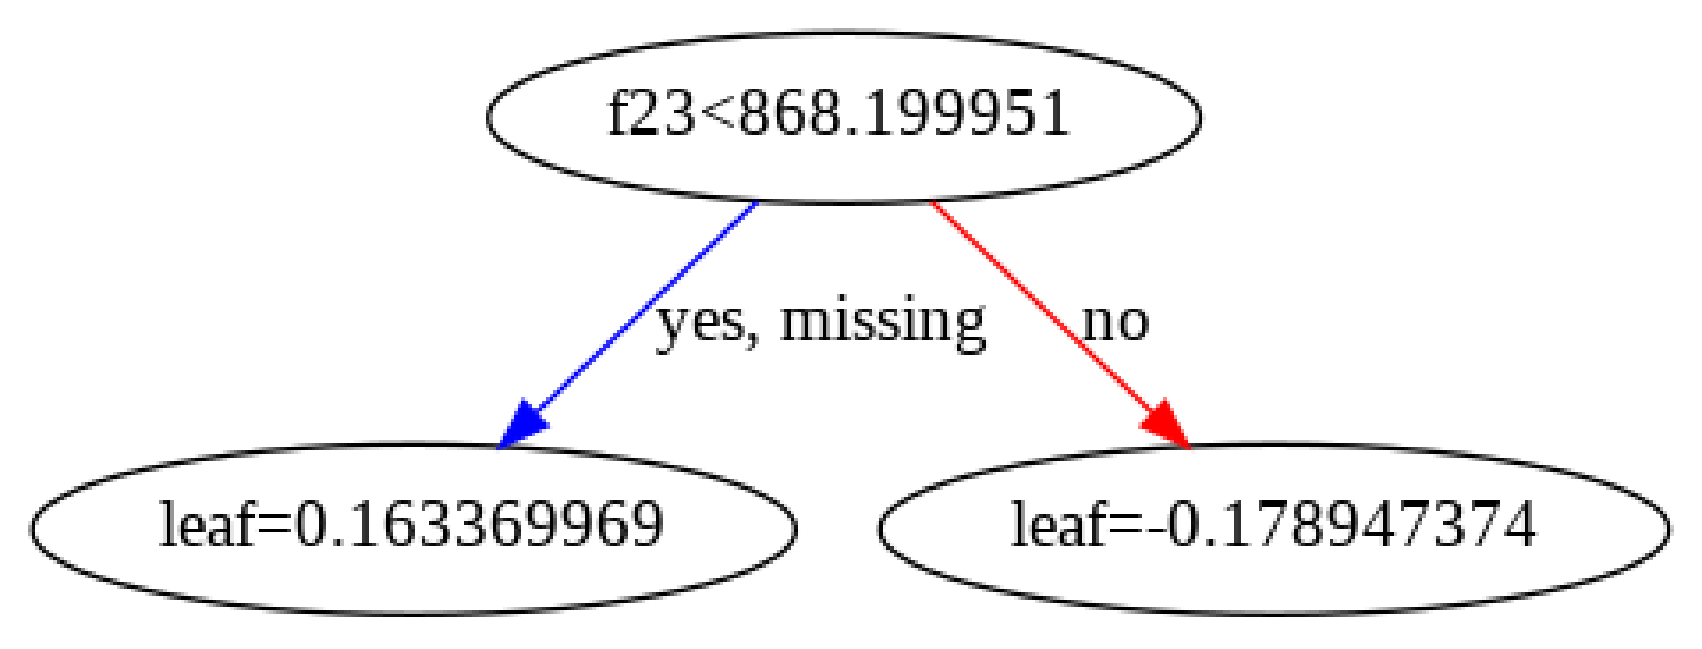

In [131]:
# plot_tree를 이용해서 트리를 시각화 할 수 있다. 
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(15,10))
plot_tree(xgb_model, ax = ax)
plt.show()

#### Wine Data (Multi classes)

In [133]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size = 0.3, shuffle = True)

In [134]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree', learning_rate=0.1, 
                              max_depth = 1, 
                              n_estimators = 10).fit(X_train, y_train)

In [135]:
xgb_model
# - 유방암 데이터와는 다르게 와인데이터에는 0, 1, 2의 y값을 가진다 따라서 
# xgboost모델은 자동적으로 objective = 'multi:softporb'으로 되어있는 것을 확인할 수 있다.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9919354838709677
test score : 0.9629629629629629


In [137]:
xgb_model.predict(X_test)

array([2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1,
       1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 1, 0, 1, 2, 1, 1])

In [138]:
xgb_model.predict_proba(X_test)

array([[0.33075213, 0.14214283, 0.52710503],
       [0.15121818, 0.6908231 , 0.15795878],
       [0.30503842, 0.44894734, 0.24601428],
       [0.20030202, 0.23652178, 0.5631762 ],
       [0.6152589 , 0.2041485 , 0.18059266],
       [0.646427  , 0.18761027, 0.16596273],
       [0.18748738, 0.6613036 , 0.15120904],
       [0.15121818, 0.6908231 , 0.15795878],
       [0.15121818, 0.6908231 , 0.15795878],
       [0.646427  , 0.18761027, 0.16596273],
       [0.30503842, 0.44894734, 0.24601428],
       [0.646427  , 0.18761027, 0.16596273],
       [0.2626297 , 0.3101199 , 0.42725042],
       [0.15121818, 0.6908231 , 0.15795878],
       [0.20030202, 0.23652178, 0.5631762 ],
       [0.646427  , 0.18761027, 0.16596273],
       [0.646427  , 0.18761027, 0.16596273],
       [0.16897392, 0.5960031 , 0.23502298],
       [0.2118695 , 0.25018096, 0.5379495 ],
       [0.15121818, 0.6908231 , 0.15795878],
       [0.13726728, 0.26166275, 0.6010699 ],
       [0.18748738, 0.6613036 , 0.15120904],
       [0.

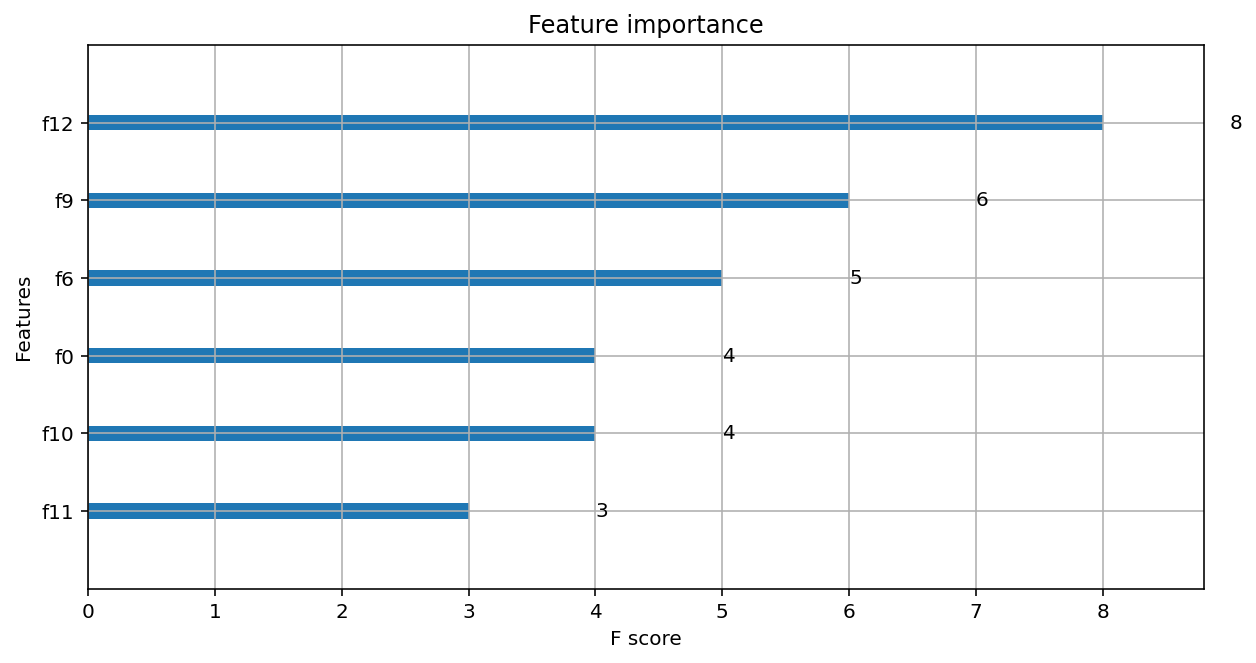

In [139]:
fig, ax = plt.subplots(figsize = (10,5))
plot_importance(xgb_model, ax = ax)
plt.show()

#  어떤 특성이 유효한지 확인할 수 있음. 

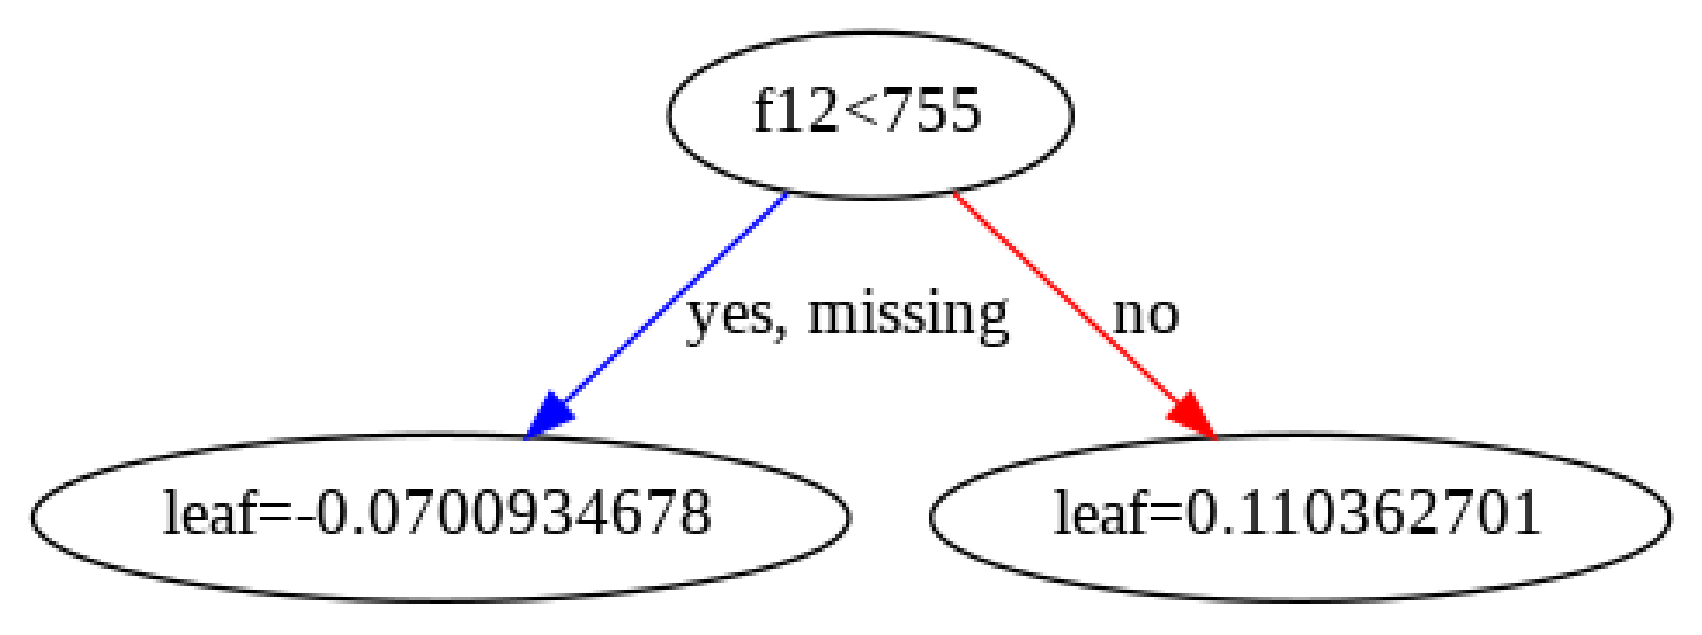

In [140]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(xgb_model, ax=ax)
plt.show()